# IOI complexity and event density

## Import dependencies, set constants etc.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

from src import utils
from src.features.features_utils import IOIComplexity
from src.visualise.complexity_plots import *

C:\Python Projects\jazz-corpus-analysis\venv\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


## Load in data

In [2]:
onsets = utils.unserialise_object(fr'{utils.get_project_root()}\models\matched_onsets_corpus_chronology.p')

In [3]:
fracs = [1, 1/2, 5/12, 3/8, 1/3, 1/4, 1/6, 1/8, 1/12, 0]
fracs_s = [r'>$\frac{1}{2}$', r'$\frac{1}{2}$', r'$\frac{5}{12}$', r'$\frac{3}{8}$', r'$\frac{1}{3}$', r'$\frac{1}{4}$', r'$\frac{1}{6}$', r'$\frac{1}{8}$', r'$\frac{1}{12}$', r'<$\frac{1}{12}$']
assert sorted(fracs, reverse=True) == fracs

In [8]:
res = []
for instr in ['piano']:
    for track in onsets:
        tempo = 60 / track.tempo
        iois = pd.Series(track.ons[instr]).diff().dropna().to_list()
        for ioi in iois:
            prop_ioi = ioi / tempo
            if prop_ioi > 4:
                continue
            prop_ioi /= 4
            bin_ = min(fracs, key=lambda x: abs(x - prop_ioi))
            res.append(dict(instr=instr, ioi=ioi, prop_ioi=prop_ioi, bin=bin_))
rhythm = pd.DataFrame(res)

In [9]:
rhythm = (
    rhythm.set_index('instr')
    .loc[utils.INSTRUMENTS_TO_PERFORMER_ROLES.keys()]
    .reset_index(drop=False)
)

KeyError: "['bass', 'drums'] not in index"

## Stacked bar plot of all IOIs

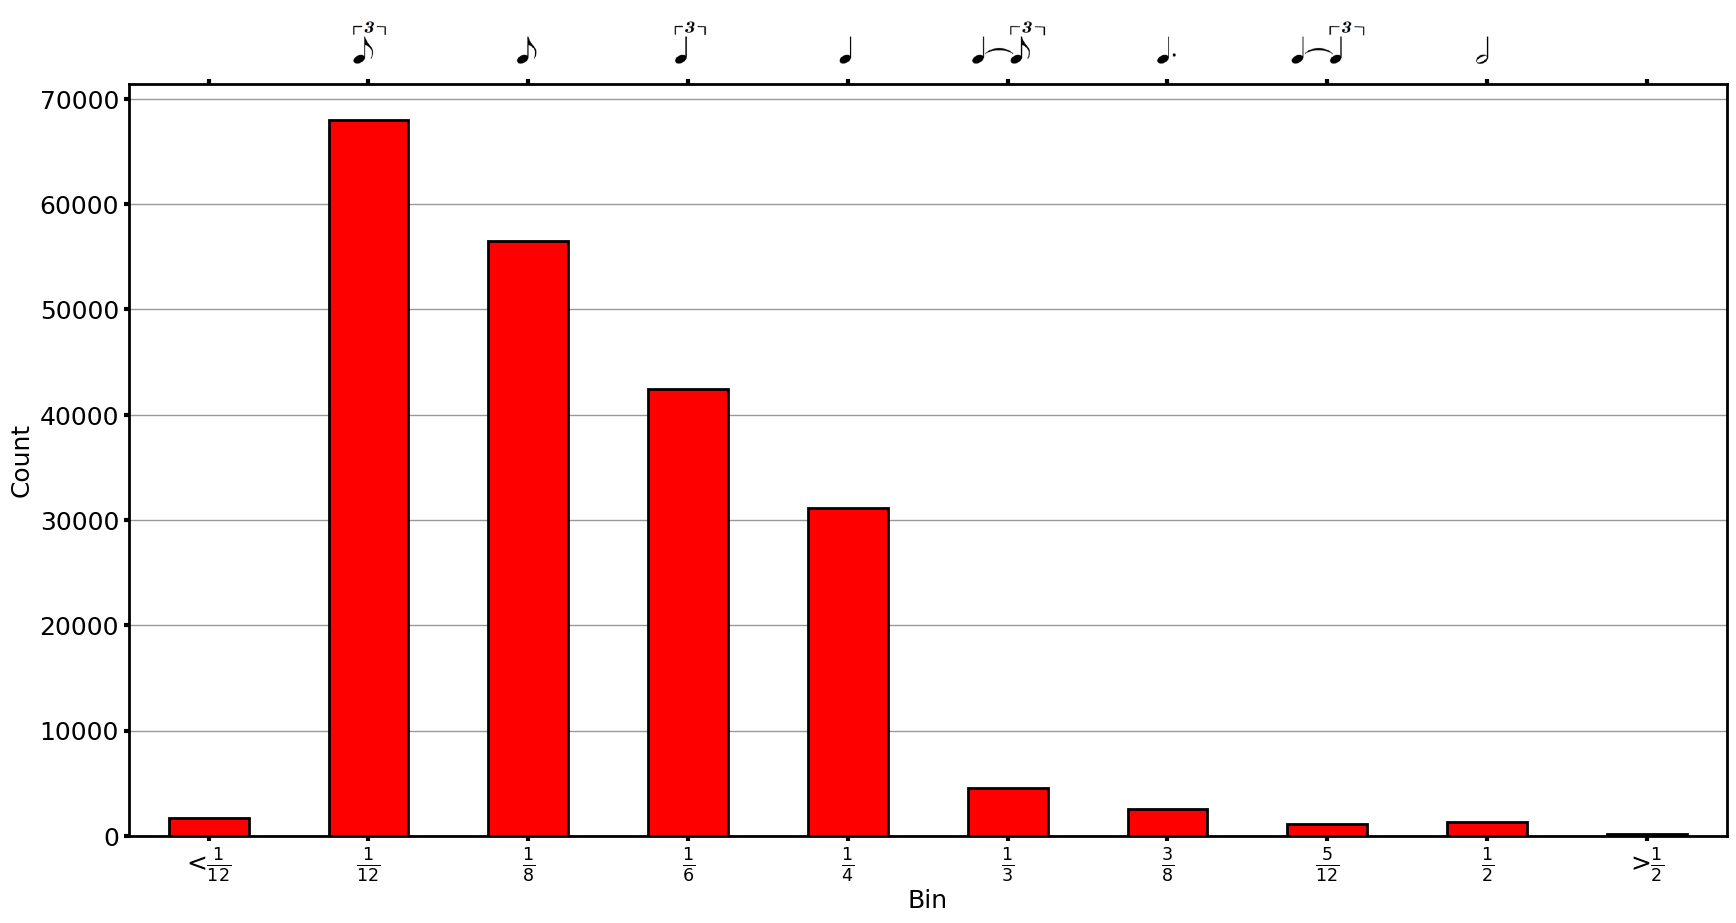

In [15]:
import src.visualise.visualise_utils as vutils

class BarPlotTotalBinsPiano(BarPlotTotalBins):
    def __init__(self, ioi_df, **kwargs):
        super().__init__(ioi_df, **kwargs)
        self.figure_title = fr'complexity_plots\barplot_totalbins_piano_{self.corpus_title}'

    def _create_plot(self):
        return self.df.plot(
            kind='bar', stacked=True, ax=self.ax, color=vutils.RED, zorder=10,
            lw=vutils.LINEWIDTH, edgecolor=vutils.BLACK, ylabel='Count',
            xlabel='Bin'
        )

    def _format_ax(self):
        self.ax.set(xticklabels=reversed(fracs_s))
        self.ax.tick_params(axis='both', width=vutils.TICKWIDTH, color=vutils.BLACK, rotation=0)
        plt.setp(self.ax.spines.values(), linewidth=vutils.LINEWIDTH, color=vutils.BLACK)
        self.ax.grid(zorder=0, axis='y', **vutils.GRID_KWS)
        self.ax.get_legend().remove()
        self._add_notation_images(y=75000)
        ax_t = self.ax.secondary_xaxis('top')
        ax_t.set_xticks(self.ax.get_xticks(), labels=[])
        ax_t.tick_params(width=vutils.TICKWIDTH)

BarPlotTotalBinsPiano(rhythm).create_plot()
plt.show()

## Histogram plot of proportional IOI durations and bins

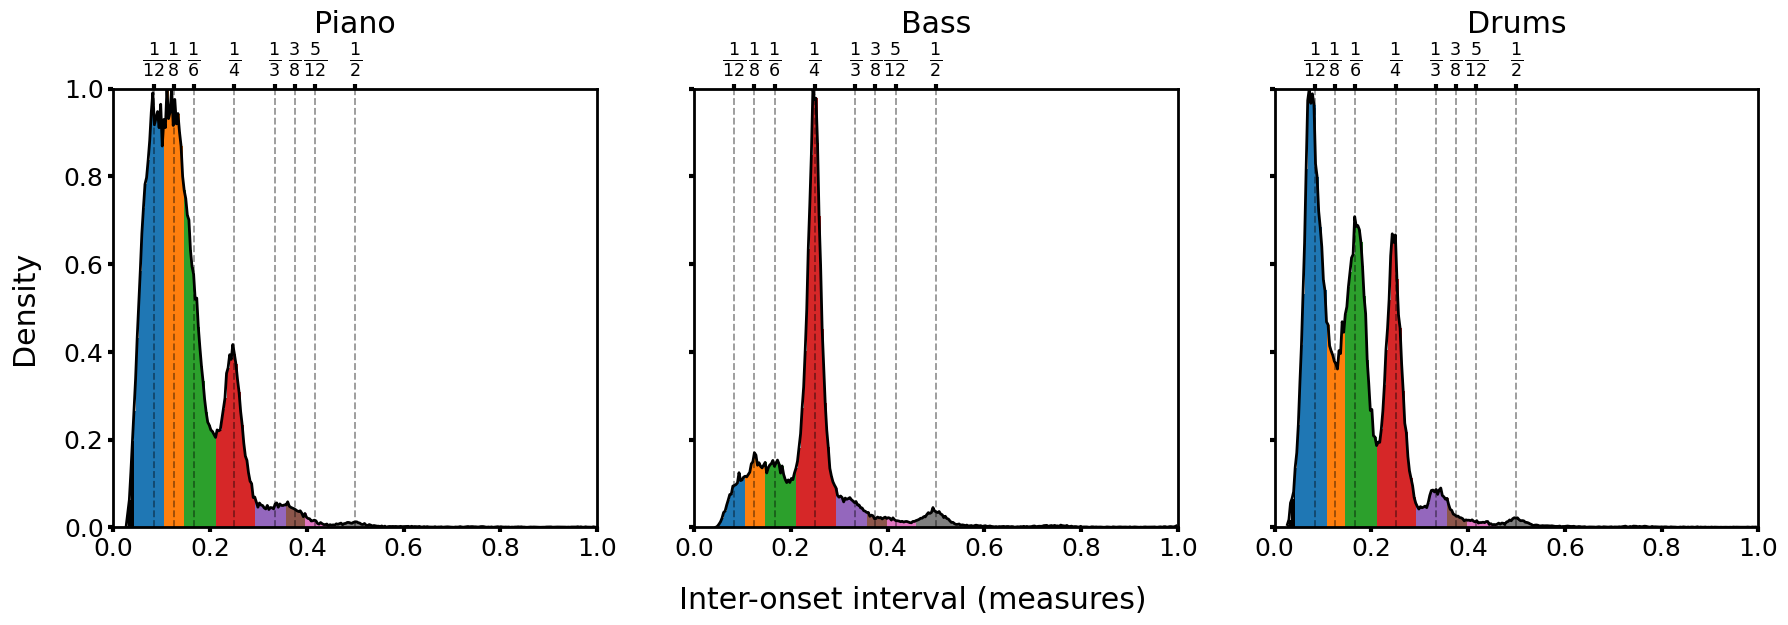

In [7]:
HistPlotBins(rhythm).create_plot()
plt.show()

## Define our extractor class for calculating IOI complexity (to be added to `src.features.features_utils`

In [5]:
cdfs = []
total_outliers = 0
total_inliers = 0
for num, t in enumerate(onsets):
    print(f'{num} / {len(onsets)}')
    downbeats = t.ons['downbeats_manual']
    tempo = t.tempo
    time_signature = t.item['time_signature']
    for instr in utils.INSTRUMENTS_TO_PERFORMER_ROLES.keys():
        my_onsets = t.ons[instr]
        cdf = IOIComplexity(
            my_onsets=my_onsets,
            downbeats=downbeats,
            tempo=tempo,
            time_signature=time_signature
        )
        total_outliers += cdf.outliers
        total_inliers += cdf.inliers
        cdf = cdf.complexity_df.mean().to_dict()
        cdf['mbz_id'] = t.item['mbz_id']
        cdf['instr'] = instr
        cdf['tempo'] = t.tempo
        cdfs.append(cdf)

0 / 300
1 / 300
2 / 300
3 / 300
4 / 300
5 / 300
6 / 300
7 / 300
8 / 300
9 / 300
10 / 300
11 / 300
12 / 300
13 / 300
14 / 300
15 / 300
16 / 300
17 / 300
18 / 300
19 / 300
20 / 300
21 / 300
22 / 300
23 / 300
24 / 300
25 / 300
26 / 300
27 / 300
28 / 300
29 / 300
30 / 300
31 / 300
32 / 300
33 / 300
34 / 300
35 / 300
36 / 300
37 / 300
38 / 300
39 / 300
40 / 300
41 / 300
42 / 300
43 / 300
44 / 300
45 / 300
46 / 300
47 / 300
48 / 300
49 / 300
50 / 300
51 / 300
52 / 300
53 / 300
54 / 300
55 / 300
56 / 300
57 / 300
58 / 300
59 / 300
60 / 300
61 / 300
62 / 300
63 / 300
64 / 300
65 / 300
66 / 300
67 / 300
68 / 300
69 / 300
70 / 300
71 / 300
72 / 300
73 / 300
74 / 300
75 / 300
76 / 300
77 / 300
78 / 300
79 / 300
80 / 300
81 / 300
82 / 300
83 / 300
84 / 300
85 / 300
86 / 300
87 / 300
88 / 300
89 / 300
90 / 300
91 / 300
92 / 300
93 / 300
94 / 300
95 / 300
96 / 300
97 / 300
98 / 300
99 / 300
100 / 300
101 / 300
102 / 300
103 / 300
104 / 300
105 / 300
106 / 300
107 / 300
108 / 300
109 / 300
110 / 300


In [7]:
total_outliers

4537

## Get the correlation of onset density and complexity

In [9]:
average = pd.DataFrame(cdfs).drop(columns=['bar_range'])
average['n_onsets'] = average['n_onsets'].astype(float)
average.head()

,lz77,n_onsets,mbz_id,instr,tempo
0,10.988235,21.435294,279743d1-86c9-40a8-9009-4b32d9111d1d,piano,286.077539
1,4.962025,10.151899,279743d1-86c9-40a8-9009-4b32d9111d1d,bass,286.077539
2,11.411765,24.117647,279743d1-86c9-40a8-9009-4b32d9111d1d,drums,286.077539
3,10.336066,21.090164,d71239a5-49bf-41f9-a2b8-b4da445d3d90,piano,300.339499
4,4.052632,7.347368,d71239a5-49bf-41f9-a2b8-b4da445d3d90,bass,300.339499


In [10]:
average.corr() ** 2

C:\Users\huwch\AppData\Local\Temp\ipykernel_21996\3407277934.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  average.corr() ** 2


,lz77,n_onsets,tempo
lz77,1.000000,0.799971,0.047808
n_onsets,0.799971,1.000000,0.120301
tempo,0.047808,0.120301,1.000000


In [11]:
stats.pearsonr(average['lz77'], average['n_onsets'])

ValueError: array must not contain infs or NaNs

In [ ]:
average.shape

## Bootstrap mean complexity/density

In [ ]:
average.groupby('instr').mean(numeric_only=True)

In [43]:
for idx, grp in average.groupby('instr'):
    for var in ['n_onsets', 'lz77']:
        true_mean = grp[var].mean()
        boots = [grp[var].sample(frac=1, replace=True, random_state=i).mean() for i in range(100)]
        low, high = np.percentile(boots, 2.5,), np.percentile(boots, 97.5)
        print(idx, var, low, true_mean, high)

bass n_onsets 12.319200190060412 12.795568651202748 13.476228722024933
bass lz77 6.195296021634048 6.4137689957621165 6.744607170137949
drums n_onsets 23.50221234004969 24.113420538078813 24.705273419466078
drums lz77 9.912126720307878 10.059352491323926 10.199071727236435
piano n_onsets 23.736967903576485 24.610311483939256 25.69534292377678
piano lz77 10.539062038625607 10.708304075130213 10.932478821914266


## Plot average complexity and density

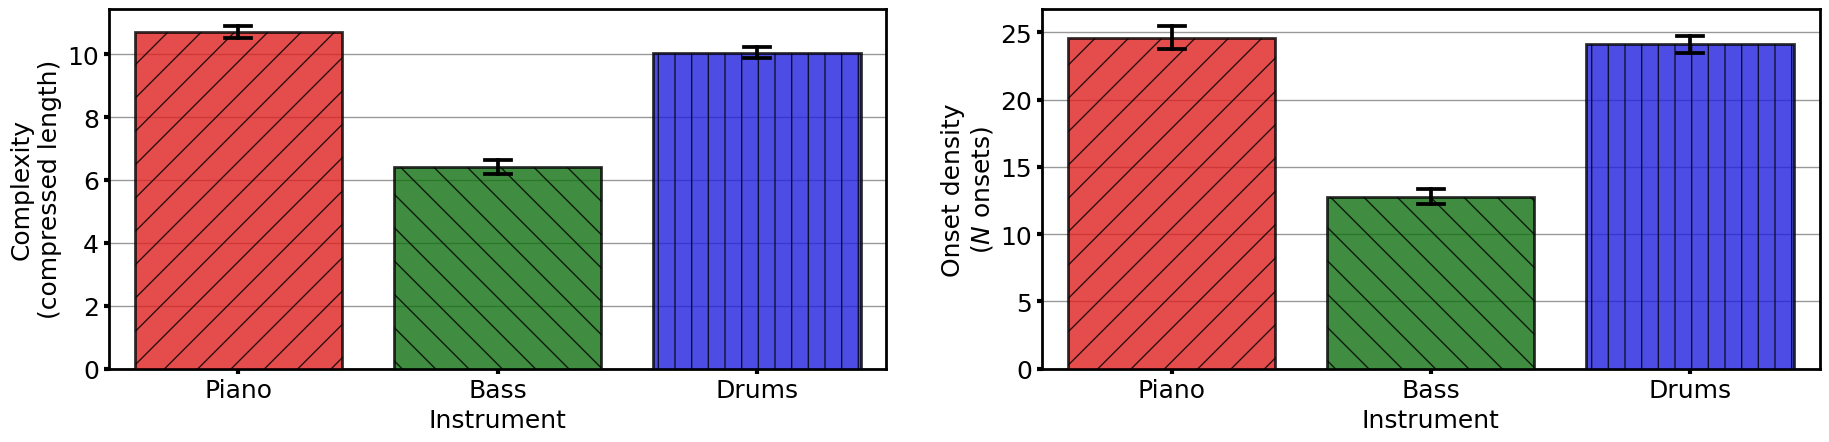

In [18]:
BarPlotComplexityDensity(average).create_plot()
plt.show()

## Plot relationships between tempo and complexity/density

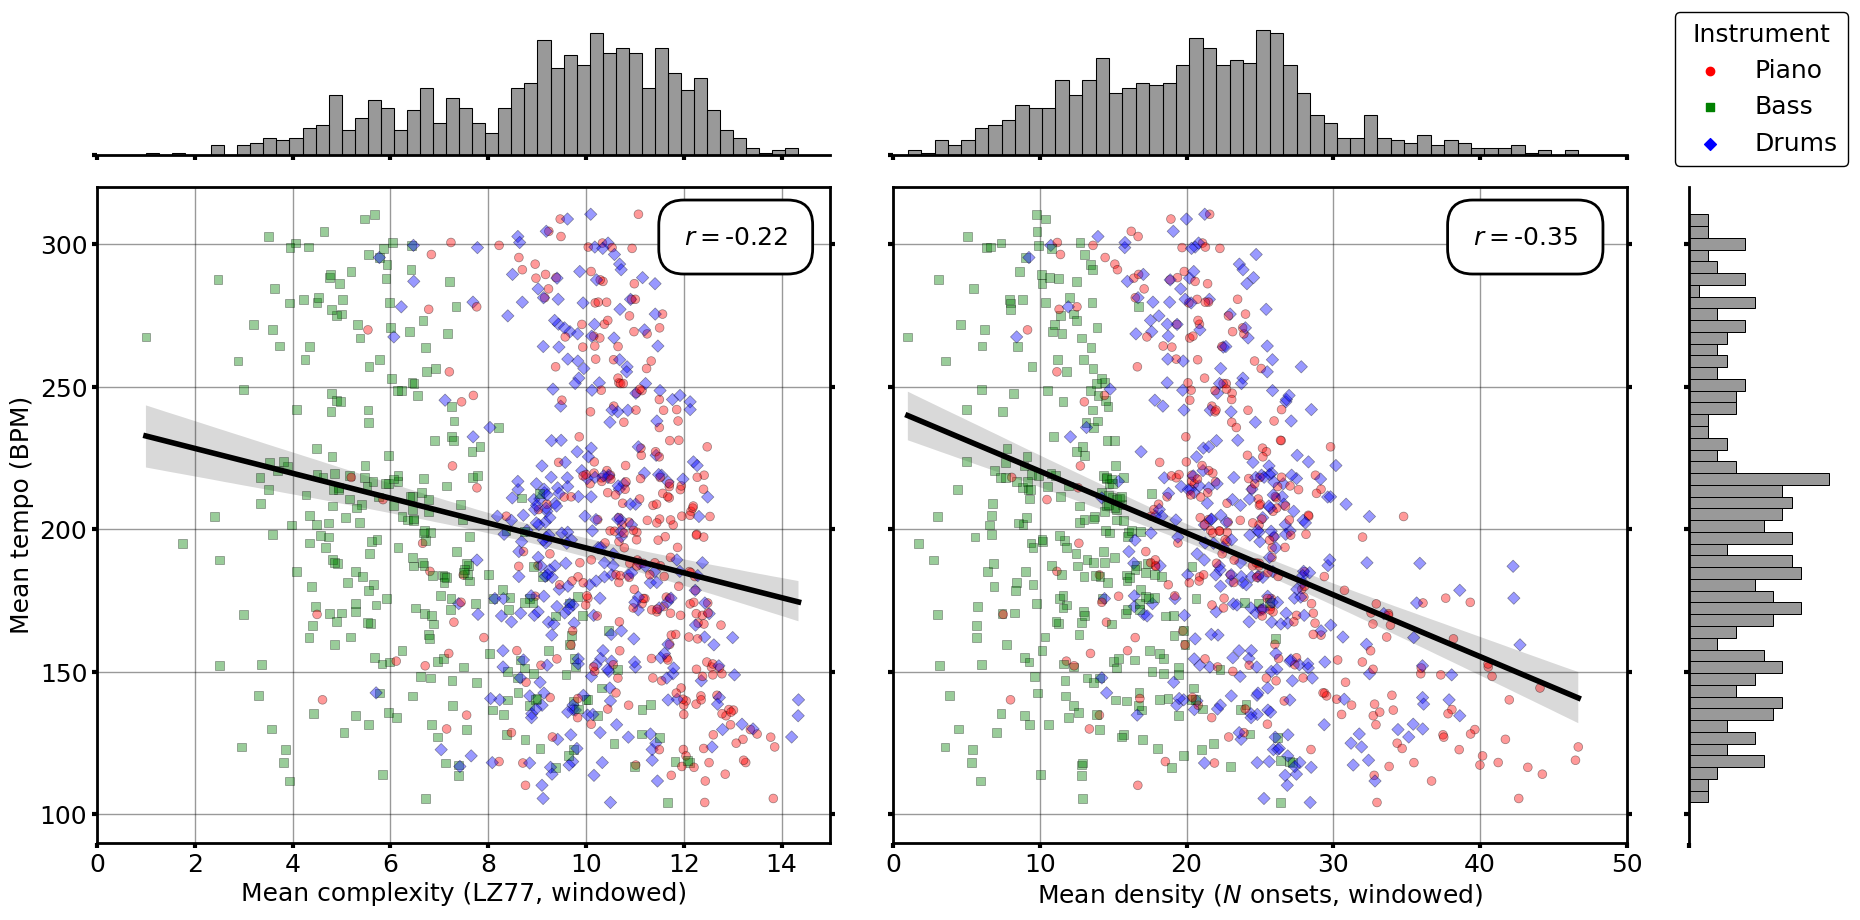

In [60]:
RegPlotTempoDensityComplexity(average).create_plot()
plt.show()

In [39]:
stats.pearsonr(average.dropna()['tempo'], average.dropna()['n_onsets'])

PearsonRResult(statistic=-0.3468446563660263, pvalue=1.4732305190800017e-26)

In [38]:
average.dropna().shape

(890, 5)